# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [50]:
import pandas as pd
import math
df = pd.read_csv('cleveland.csv')
bins = [-1,0,4]
names = {"normal", "enfermo"}
df['target'] = pd.cut(df['target'], bins, labels = names)
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


Despues de cargar los datos del csv modificamos la columna target para que sea categorica. Primero le indicamos los rangos que vamos a tener en cuenta (0 y 1-4 en nuestro caso) y los nombres que les daremos a esos rangos (normal y enfermo). Despues usamos la funcion cut de pandas para conseguir esto y eliminamos las filas a las que les falta algun valor con la funcion dropna().

## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [51]:
df_new = pd.read_csv('cleveland.csv')
df_new[df_new.target == 4].count()

age         13
sex         13
cp          13
trestbps    13
chol        13
fbs         13
restecg     13
thalach     13
exang       13
oldpeak     13
slope       13
ca          13
thal        13
target      13
dtype: int64

Podemos tener un pequeño desequilibrio ya que la enfermedad de tipo 4 puede ser una clase minoritaria, hay pocos casos (13). Esto puede causar un problema en la generalizacion, aunque no creo que haya tan pocos casos de esa clase como para tenerlo en cuenta.

Repasando el ejercicio, si en este problema solo tenemos en cuenta si una persona está enferma o no, los datos estarían mas equilibrados, ya que las dos clases (enfermo y normal) son suficientemente grandes

In [52]:
media = df["age"].mean()
mediana = df["age"].median()
mode = df["age"].mode()
std = df["age"].std(ddof=0)
rango = df["age"].max() - df["age"].min()
print("""
-Age-
    Media: %f
    Mediana: %f
    Moda: %f
    Desviación típica: %f
    Rango: %f
""" % (media,mediana,mode,std,rango))


-Age-
    Media: 54.438944
    Mediana: 56.000000
    Moda: 58.000000
    Desviación típica: 9.023735
    Rango: 48.000000



In [53]:
media = df["chol"].mean()
mediana = df["chol"].median()
std = df["chol"].std(ddof=0)
rango = df["chol"].max() - df["chol"].min()
print("""
-Cholestoral-
    Media: %f
    Mediana: %f
    Desviación típica: %f
    Rango: %f
""" % (media,mediana,std,rango))


-Cholestoral-
    Media: 246.693069
    Mediana: 241.000000
    Desviación típica: 51.691406
    Rango: 438.000000



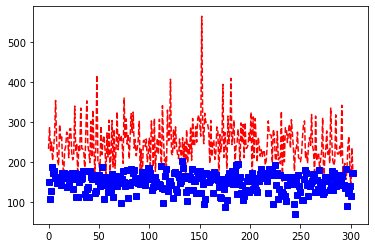

In [54]:
'''Diagrama de dispersion entre cholestoral y thalach'''
import matplotlib.pyplot as plt
plt.plot(df["chol"], 'r--', df["thalach"], 'bs')
plt.show()

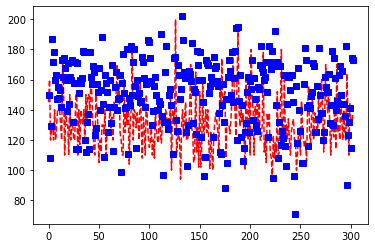

In [55]:
'''Diagrama de dispersion entre trestbps y thalach'''
import matplotlib.pyplot as plt
plt.plot(df["trestbps"], 'r--', df["thalach"], 'bs')
plt.show()

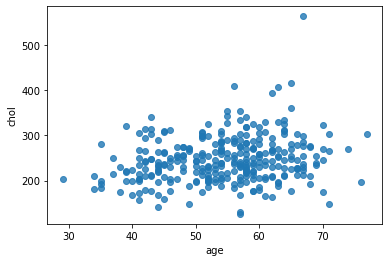

In [62]:
'''Coeficiente de correlación entre age y chol'''
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(df["age"], df["chol"], alpha= 0.8)
ax.set_xlabel('age')
ax.set_ylabel('chol');

No parece que haya relacion entre ambas variables

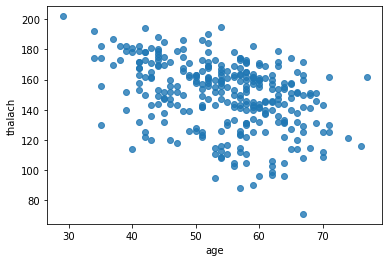

In [63]:
'''Coeficiente de correlación entre age y thalach'''
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(df["age"], df["thalach"], alpha= 0.8)
ax.set_xlabel('age')
ax.set_ylabel('thalach');

Entre estas dos variables parece que puede haber una relacion lineal negativa debil

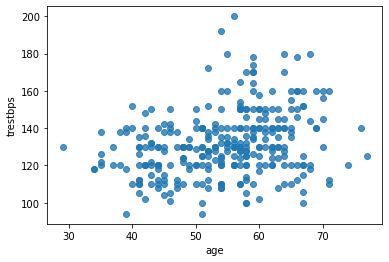

In [64]:
'''Coeficiente de correlación entre age y trestbps'''
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(df["age"], df["trestbps"], alpha= 0.8)
ax.set_xlabel('age')
ax.set_ylabel('trestbps');

In [ ]:
Entre estas dos variables tampoco hay ninguna relación.



No parece haber mucha relacion entre las variables, y esto nos va a suponer un problema dificil de resolver.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.